In [1]:
import cv2
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['agg.path.chunksize'] = 10000
path = input("Enter image path:")

image = cv2.imread(path, 0)
# key_image = cv2.imread("city.jpg", 0)
# key_image.resize(image.shape)
# cv2.imshow("Image", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# cv2.imshow("Key Image", key_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

print(image.shape)
# print(key_image.shape)

(696, 1200)


In [3]:
hist_orig = cv2.calcHist(image, [0], None, [256], [0,256])
# plt.plot(hist_orig)
# plt.show

In [4]:
def henon_attractor(x, y, a=1.4, b=0.3):
	x_next = 1 - a * x ** 2 + y
	y_next = b * x
	return x_next, y_next

In [5]:
def encrypt(matr_fused_image, a, b, x, y):
    size = np.size(matr_fused_image)
    x_array = np.zeros(size+1)
    y_array = np.zeros(size+1)
    y_array[0] = 0.56
    x_array[0] = -0.7
    for i in range(size):
        x_next, y_next = henon_attractor(x_array[i], y_array[i])
        x_array[i+1] = x_next
        y_array[i+1] = y_next

    # # # print(x_array, y_array)
    # plt.scatter(x_array, y_array, marker='.')
    # # # plt.plot(x_array, y_array, 'ro', linestyle="None")
    # plt.show()
    return x_array, y_array
    #################ENCRYPTION##################


In [6]:
img = np.asarray(image)
print(img)

# img = fusion(img, key_image, 0.9)

x_map,y_map = encrypt(img, 1.3, 0.6, 1.2, 0.5)
for i in range(x_map.size):
    x_map[i] = int(x_map[i]*1000)%256

for j in range(y_map.size):
    y_map[j] = int(y_map[j]*1000)%256
print(x_map, y_map)

#####################################


[[68 68 68 ... 34 34 34]
 [68 68 68 ... 34 34 34]
 [69 69 69 ... 34 34 34]
 ...
 [32 20 32 ... 48 45 50]
 [24 25 30 ... 52 50 43]
 [11 25 30 ... 69 67 52]]
[ 68. 106. 233. ... 186.  84.  65.] [ 48.  46.   6. ...  70.  82. 255.]


In [7]:
enc_img = np.zeros(img.shape)
z = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        enc_img[i][j] = int(img[i][j]) ^ int(x_map[z])
        z+=1

z = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        enc_img[i][j] = int(img[i][j]) ^ int(y_map[z])
        z+=1


In [9]:
# enc_image = cv2.
cv2.imwrite("encrypted.jpg", enc_img)

encrypted_image = cv2.imread("encrypted.jpg",0)
hist_enc = cv2.calcHist(encrypted_image, [0], None, [256], [0,256])

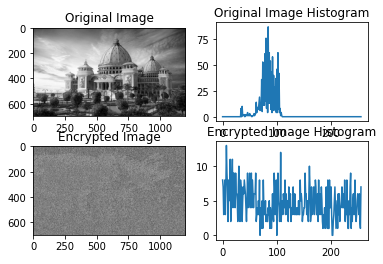

In [11]:
fig, axs = plt.subplots(2,2)

axs[0,0].imshow(image, cmap='gray')
axs[0,0].set_title('Original Image')
axs[0,1].plot(hist_orig)
axs[0,1].set_title('Original Image Histogram')
axs[1,0].imshow(encrypted_image, cmap='gray')
axs[1,0].set_title('Encrypted Image')
axs[1,1].plot(hist_enc)
axs[1,1].set_title('Encrypted Image Histogram')
plt.show()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [12]:
def decrypt(enc_img, x_map, y_map):
    dec_img = np.zeros(img.shape)
    z = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            dec_img[i][j] = int(enc_img[i][j]) ^ int(x_map[z])
            z+=1

    z = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            dec_img[i][j] = int(enc_img[i][j]) ^ int(y_map[z])
            z+=1
    
    return dec_img

In [13]:
dec_img = decrypt(enc_img, x_map, y_map)
cv2.imwrite("decrypted.jpg", dec_img)

True